**Análisis de ontología genética (GO)**

<p style="font-family:'Times New Roman'">
¿Qué es el análisis de ontología genética?
<p style="font-family:'Times New Roman'">
El análisis de Ontología Génica (OG) es una herramienta bioinformática que categoriza los genes con expresión diferencial según sus procesos biológicos, componentes celulares y funciones moleculares asociados. Esta categorización se basa en un vocabulario estructurado y jerárquico conocido como Ontología Génica, que describe sistemáticamente las funciones génicas. En el contexto de la investigación del músculo esquelético, el análisis de OG proporciona información sobre las funciones biológicas de los genes con expresión diferencial, lo que ayuda a dilucidar los efectos específicos de las intervenciones de ejercicio.
<p style="font-family:'Times New Roman'">
Mientras que el análisis de expresión diferencial identifica genes que se regulan al alza o a la baja en respuesta a una intervención, tratamiento o régimen farmacológico, el análisis de GO va un paso más allá al vincular estos genes con contextos biológicos más amplios. Al agrupar los genes en categorías funcionales, el análisis de GO puede revelar qué procesos biológicos, funciones moleculares o componentes celulares se ven afectados, ofreciendo una comprensión más detallada de los mecanismos mediante los cuales una intervención, tratamiento o fármaco ejerce sus efectos.
<p style="font-family:'Times New Roman'">
¿Cómo se utiliza el análisis GO en la investigación del músculo esquelético?
En la investigación del músculo esquelético, el análisis de Ontología Génica (OG) puede utilizarse para identificar y categorizar los procesos biológicos afectados por el ejercicio o una lesión muscular. Por ejemplo, tras el entrenamiento de resistencia, el análisis de OG podría mostrar un enriquecimiento de genes asociados con la hipertrofia muscular, como los implicados en la síntesis de proteínas, el desarrollo de fibras musculares y la respuesta a estímulos mecánicos. Esto ayuda a los investigadores a comprender qué procesos biológicos específicos impulsan el crecimiento y la adaptación muscular, proporcionando información que puede fundamentar protocolos de entrenamiento o enfoques terapéuticos para mejorar la reparación y regeneración muscular.

<p style="font-family:'Times New Roman'">
Realizar análisis GO
<p style="font-family:'Times New Roman'">
Antes de mostrarles cómo realizar el análisis GO, importaré todas las bibliotecas y datos utilizados en este tutorial. Cabe destacar que el conjunto de datos utilizado contiene una lista de genes con expresión diferencial tras un estímulo de ejercicio.



In [1]:
# import libraries
import pandas as pd
import numpy as np
from gprofiler import GProfiler
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy as gp

# load data and view first few rows
filename = 'skeletal_muscle.csv'
data = pd.read_csv(filename)
skeletal_muscle = pd.DataFrame(data)
skeletal_muscle.head()

/Users/alex/miniconda3/envs/py39/lib/python3.9/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


,Unnamed: 0,names,scores,pvals,pvals_adj
0,0,APOD,31.004278,4.720000e-211,9.440000e-208
1,1,DCN,30.380283,1.000000e-202,2.000000e-199
2,2,GSN,29.149391,8.500000e-187,1.700000e-183
3,3,CFD,26.491886,1.200000e-154,2.400000e-151
4,4,MGP,25.059530,1.370000e-138,2.750000e-135


<p style="font-family:'Times New Roman'">
Como puede ver en la imagen de arriba, nuestro marco de datos contiene una columna llamada names, que contiene los nombres de los genes, una columna llamada scoresque representa una estadística de prueba generada por una prueba de suma de rangos de Wilcoxon para cada gen (un gen con una puntuación positiva se regula positivamente en la condición posterior al ejercicio en relación con la línea de base y la puntuación negativa se regula negativamente en la condición posterior al ejercicio en relación con la línea de base), y dos columnas llamadas pvalsy pvals_adj, que indican la importancia de cada puntuación asociada a un gen.
<p style="font-family:'Times New Roman'">
Ahora, antes de realizar el análisis GO, queremos ver la distribución de nuestros puntajes, que se muestra en el bloque de código a continuación, para ayudarnos a determinar los criterios de filtrado óptimos para seleccionar los genes más significativos.

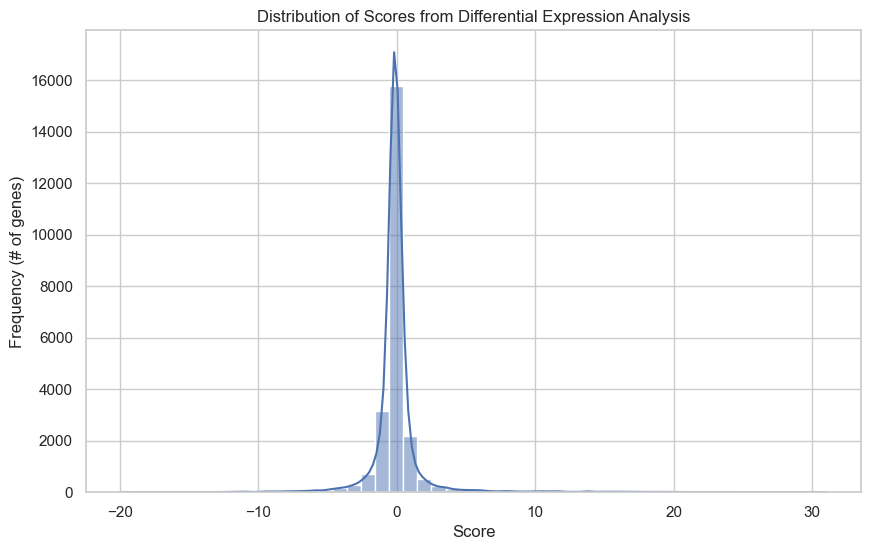

In [2]:
# view distribution of scores
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(skeletal_muscle['scores'], bins=50, kde=True)
plt.title('Distribution of Scores from Differential Expression Analysis')
plt.xlabel('Score')
plt.ylabel('Frequency (# of genes)')
plt.show()

<p style="font-family:'Times New Roman'">
En la imagen superior se puede observar que las puntuaciones de la prueba de suma de rangos de Wilcoxon se distribuyen normalmente. Calcularemos la media y la desviación estándar de las puntuaciones y usaremos la media + 1,5 desviaciones estándar como umbral para identificar genes con una expresión diferencial significativa. A continuación, filtraremos los genes con puntuaciones superiores a este umbral y valores p inferiores a 0,05, y los guardaremos en una variable llamada significant_genes antes de extraer la lista de nombres de genes, que se utilizará en nuestro análisis GO.

In [3]:
# calculate mean and standard deviation of the scores
mean_score = skeletal_muscle['scores'].mean()
std_score = skeletal_muscle['scores'].std()

# set the threshold as mean + 1.5 standard deviations
threshold = mean_score + 1.5 * std_score

# filter for genes with scores greater than the threshold and p-value < 0.05
significant_genes = skeletal_muscle[(skeletal_muscle['scores'] > threshold) & (skeletal_muscle['pvals_adj'] < 0.05)]

# extract list of gene names for these significant genes
gene_list = significant_genes['names'].tolist()

<p style="font-family:'Times New Roman'">
Ahora, estamos listos para realizar nuestro análisis GO, como se muestra en el bloque de código a continuación.



In [4]:
# initialize GProfiler and return result in pandas DataFrame format
gp = GProfiler(return_dataframe=True)

# perform GO analysis using the significant gene list
go_results = gp.profile(organism='hsapiens', query=gene_list)

# display the first few results
print(go_results.head())

  source      native                            name       p_value  \
0  GO:CC  GO:0005576            extracellular region  5.263725e-35   
1  GO:BP  GO:0001568        blood vessel development  2.293754e-33   
2  GO:BP  GO:0001944         vasculature development  3.252073e-33   
3  GO:CC  GO:0071944                  cell periphery  5.071141e-33   
4  GO:BP  GO:0072359  circulatory system development  7.110476e-33   

   significant                                        description  term_size  \
0         True  "The space external to the outermost structure...       4258   
1         True  "The process whose specific outcome is the pro...        732   
2         True  "The process whose specific outcome is the pro...        762   
3         True  "The broad region around and including the pla...       6347   
4         True  "The process whose specific outcome is the pro...       1145   

   query_size  intersection_size  effective_domain_size  precision    recall  \
0         300     

<p style="font-family:'Times New Roman'">
El resultado de nuestro análisis de GO incluye diversos tipos de información, como se muestra en la imagen superior. La sourcecolumna indica el origen del término GO, donde, por ejemplo, GO:CCse refiere a términos de componentes celulares y GO:BPse refiere a términos de procesos biológicos. Cada término GO tiene un identificador único, que se muestra en la nativecolumna.
<p style="font-family:'Times New Roman'">
La salida también proporciona el contexto biológico de cada término GO. La namecolumna especifica qué representa cada término GO y descriptionofrece detalles adicionales sobre su importancia biológica. La significancia estadística de los términos GO se indica mediante la p_valuecolumna, que significantcontiene un valor booleano (Verdadero o Falso) que indica si el enriquecimiento es estadísticamente significativo.
<p style="font-family:'Times New Roman'">
Para comprender cómo se representan ciertos términos GO en el genoma humano y en nuestra muestra específica, podemos observar las columnas , , y . term_sizeindica query_sizeel intersection_sizenúmero total de genes asociados con un término GO específico en el genoma humano de referencia, mientras que muestra el número de genes de nuestra lista de genes que están potencialmente relacionados con ese término GO. se refiere al número de genes de nuestra lista que están asociados con el término GO y se identifican como significativos; este es un subconjunto de . La columna enumera los términos GO principales del término actual, lo que nos ayuda a comprender las relaciones jerárquicas entre los términos.parentsTerm_sizequery_sizeIntersection_sizequery_sizeparents
<p style="font-family:'Times New Roman'">
Finalmente, el resultado incluye métricas de evaluación como precisiony recall, que ofrecen información sobre la calidad de los resultados de enriquecimiento. Una alta precisión indica que la mayoría de los genes identificados en el término GO son relevantes, mientras que una alta recuperación significa que se han detectado muchos de los genes relevantes.
<p style="font-family:'Times New Roman'">
Ahora, para comprender mejor estos resultados, utilizaré un gráfico de barras para representar gráficamente los 10 términos de enriquecimiento principales frente a sus respectivos tamaños de intersección, como se muestra a continuación.



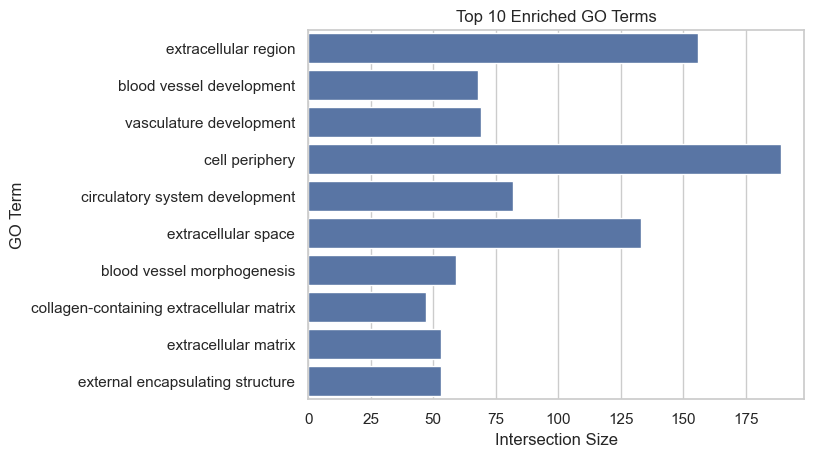

In [5]:
sns.barplot(x='intersection_size', y='name', data=go_results.head(10))
plt.title('Top 10 Enriched GO Terms')
plt.xlabel('Intersection Size')
plt.ylabel('GO Term')
plt.show()

<p style="font-family:'Times New Roman'">
Como puede ver, nuestros términos GO principales incluyen componentes celulares, como la matriz extracelular que contiene colágeno, así como procesos biológicos como el desarrollo de vasos sanguíneos, vascular y del sistema circulatorio, lo cual es lógico dado que nuestros datos contienen genes que se expresan de forma diferencial tras un estímulo de ejercicio intenso. Además del gráfico de barras anterior, existen otras visualizaciones útiles para los términos GO, como mapas de enriquecimiento, gráficos de red de conceptos genéticos, mapas de calor, árboles de jerarquía de términos GO y gráficos CIRCOS.

**Análisis de vías**
<p style="font-family:'Times New Roman'">
¿Qué es el análisis de vías?
<p style="font-family:'Times New Roman'">
El análisis de vías es un método bioinformático utilizado para identificar vías de señalización y metabólicas que se enriquecen en una lista de genes expresados ​​de forma diferencial, lo que nos ayuda a comprender cómo interactúan los genes dentro de vías específicas.
<p style="font-family:'Times New Roman'">
Aunque similar al análisis GO, el análisis de vías es más específico, ya que mapea genes con expresión diferencial a vías biológicas conocidas, como las de las bases de datos KEGG o Reactome. Esto proporciona una visión detallada de cómo los genes funcionan conjuntamente en los sistemas biológicos y permite identificar vías clave alteradas por el tratamiento, lo que nos ayuda a comprender mecanismos biológicos complejos e identificar posibles dianas terapéuticas.
<p style="font-family:'Times New Roman'">
¿Cómo se utiliza el análisis de vías en la investigación del músculo esquelético?
<p style="font-family:'Times New Roman'">
En la investigación del músculo esquelético, el análisis de vías puede identificar vías clave implicadas en la adaptación muscular al ejercicio, como la vía de señalización AMPK o la vía mTOR. Por ejemplo, tras el entrenamiento de resistencia, el análisis de vías podría revelar la activación de las vías de fosforilación oxidativa y biogénesis mitocondrial, lo que indica una mejora del metabolismo energético y la función mitocondrial. Este conocimiento puede ayudar a los investigadores a comprender los mecanismos moleculares que subyacen a la resistencia muscular y guiar el desarrollo de regímenes de ejercicio o estrategias nutricionales para optimizar el rendimiento muscular.
<p style="font-family:'Times New Roman'">
Realización de análisis de vías
<p style="font-family:'Times New Roman'">
Muchos de los pasos necesarios para realizar el análisis de vías se superponen con los del análisis GO mencionado anteriormente. Por lo tanto, podemos omitir los pasos iniciales y pasar directamente al análisis de vías, utilizando nuestra lista de genes significativos (denominada gene_list), como se muestra a continuación.

In [6]:
# perform pathway analysis
pathway_analysis_results = gp.profile( organism='hsapiens',  query=gene_list, sources=["KEGG", "REAC"])

# display the results
print(pathway_analysis_results.head())

  source              native                                name  \
0   REAC  REAC:R-HSA-1474244   Extracellular matrix organization   
1   REAC   REAC:R-HSA-216083  Integrin cell surface interactions   
2   KEGG          KEGG:04510                      Focal adhesion   
3   REAC  REAC:R-HSA-3000178                   ECM proteoglycans   
4   KEGG          KEGG:04512            ECM-receptor interaction   

        p_value  significant                         description  term_size  \
0  3.338399e-13         True   Extracellular matrix organization        298   
1  2.743834e-10         True  Integrin cell surface interactions         84   
2  4.099802e-10         True                      Focal adhesion        202   
3  7.079379e-10         True                   ECM proteoglycans         76   
4  1.028177e-08         True            ECM-receptor interaction         89   

   query_size  intersection_size  effective_domain_size  precision    recall  \
0         220                 33    

<p style="font-family:'Times New Roman'">
Como puede ver en la imagen superior, los resultados de nuestro análisis de vías son similares al análisis de GO, con algunas diferencias sutiles. Por ejemplo, la nativecolumna se refiere a la base de datos a partir de la cual se identificó una vía determinada, y en lugar de namereferirse a componentes celulares o procesos biológicos específicos, se refiere a vías significativamente asociadas con los genes de nuestra lista (es decir, es probable que los genes de nuestra muestra participen o afecten a estas vías más de lo que cabría esperar por casualidad).
<p style="font-family:'Times New Roman'">
Ahora, podemos visualizar las diez principales vías enriquecidas utilizando el código a continuación.



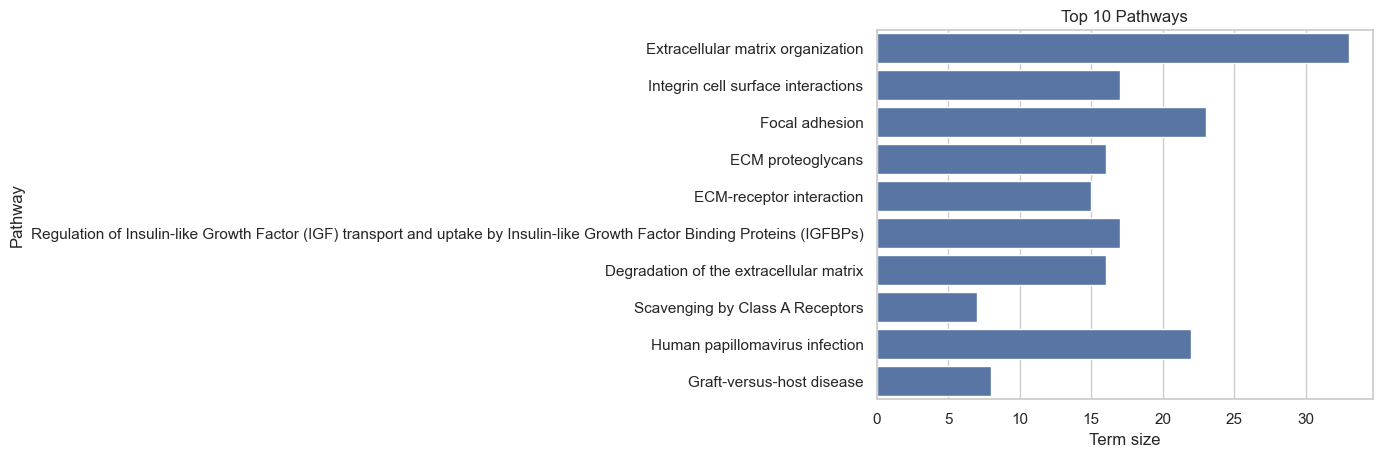

In [7]:
sns.barplot(x='intersection_size', y='name', data=pathway_analysis_results.head(10))
plt.title('Top 10 Pathways')
plt.xlabel('Term size')
plt.ylabel('Pathway')
plt.show()

<p style="font-family:'Times New Roman'">
Cabe destacar que hemos identificado un enriquecimiento en una vía asociada con la regulación del transporte y la captación de IGF, lo cual no resulta sorprendente dada nuestra fuente de datos. Sin embargo, también se han obtenido resultados inesperados, como el enriquecimiento de una vía asociada con la infección por el virus del papiloma humano. Una posible razón para esto podría ser que muchas vías celulares se comparten entre diferentes tejidos. Por ejemplo, las vías implicadas en la regulación del ciclo celular, las respuestas al estrés o la apoptosis podrían activarse por la infección por VPH y también podrían ser relevantes en las células musculares. Esta interacción puede llevar a la identificación de vías relacionadas con el VPH en tejidos aparentemente no relacionados.



**Análisis de enriquecimiento del conjunto de genes (GSEA)**
<p style="font-family:'Times New Roman'">
¿Qué es el análisis de enriquecimiento del conjunto de genes?
<p style="font-family:'Times New Roman'">
El Análisis de Enriquecimiento de Conjuntos Genéticos (GSEA) es una técnica computacional diseñada para determinar si conjuntos predefinidos de genes presentan diferencias estadísticamente significativas en su expresión entre dos o más condiciones biológicas. A diferencia del análisis de expresión diferencial, que identifica genes individuales que cambian significativamente entre condiciones, el GSEA evalúa la lista completa de genes, ordenada antes y después del tratamiento. No requiere la preselección de genes con expresión diferencial. En su lugar, el GSEA evalúa si los conjuntos predefinidos de genes (grupos de genes asociados por función, vía u otros criterios) presentan cambios significativos y coordinados en su expresión.
<p style="font-family:'Times New Roman'">
Este método complementa el análisis de expresión diferencial al centrarse en el enriquecimiento de conjuntos de genes en lugar de en cambios en genes individuales. Es especialmente útil para detectar cambios sutiles y coordinados en la expresión que podrían pasar desapercibidos al examinar genes individuales de forma aislada.
<p style="font-family:'Times New Roman'">
¿Cómo se utiliza GSEA en la investigación del músculo esquelético?
<p style="font-family:'Times New Roman'">
En el contexto de la investigación del músculo esquelético, la GSEA puede aplicarse para comprender los efectos más amplios de diversos regímenes de ejercicio o intervenciones musculares específicas sobre la expresión génica. Por ejemplo, tras un período de entrenamiento de resistencia, la GSEA podría revelar un enriquecimiento significativo de conjuntos de genes relacionados con la hipertrofia muscular, la síntesis de proteínas o la contracción muscular. Esto indica que el entrenamiento de resistencia ha provocado cambios coordinados en la expresión de genes implicados en estos procesos. Al analizar la lista completa de genes clasificados de muestras previas y posteriores al entrenamiento, la GSEA también puede identificar si vías biológicas específicas o conjuntos de genes funcionales se activan o reprimen de forma más prominente.
<p style="font-family:'Times New Roman'">
Sin embargo, a pesar de la utilidad del GSEA, existen escenarios en los que podría no ser necesario. Por ejemplo, si su investigación se centra estrictamente en vías o funciones biológicas específicas, otros métodos analíticos como el análisis de ontología génica (GO) y el análisis de vías podrían ser suficientes. Por ejemplo, si su estudio busca comprender los efectos de una intervención específica en una vía conocida, como la vía mTOR en la hipertrofia muscular, el análisis de vías podría revelar directamente cómo se ve afectada esta vía específica. En tales casos, el enfoque más amplio del GSEA podría proporcionar información redundante o menos relevante, lo que hace que los análisis más específicos sean más apropiados.
<p style="font-family:'Times New Roman'">
Realización de GSEA
<p style="font-family:'Times New Roman'">
En esta última sección, les mostraré cómo realizar GSEA. Para comenzar, necesitaremos preparar un archivo de rangos, un formato específico utilizado en GSEA para representar el ordenamiento de los genes según una puntuación cuantitativa, como la prueba de suma de rangos de Wilcoxon, el logaritmo del cambio de pliegues o el valor p.



<p style="font-family:'Times New Roman'">
Luego, después de crear nuestro archivo de rango, podemos realizar GSEA usando el código a continuación.



In [13]:
import gseapy as gp  # Ahora gp es solo gseapy

# Crear ranking para GSEA
rank_df = pd.DataFrame({
    'gene': skeletal_muscle['names'], 
    'score': skeletal_muscle['scores']
})

# Realizar GSEA
gsea_results = gp.prerank(
    rnk=rank_df, 
    gene_sets='KEGG_2016', 
    permutation_num=100, 
    seed=5
)
print(gsea_results.res2d.head())

2026-01-28 20:07:55,197 [WARNING] Duplicated values found in preranked stats: 18.17% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


      Name                                              Term        ES  \
0  prerank          Metabolic pathways Homo sapiens hsa01100  0.839477   
1  prerank      Rap1 signaling pathway Homo sapiens hsa04015   0.89219   
2  prerank  PI3K-Akt signaling pathway Homo sapiens hsa04151   0.90091   
3  prerank          Pathways in cancer Homo sapiens hsa05200  0.874995   
4  prerank    Herpes simplex infection Homo sapiens hsa05168  0.892508   

        NES NOM p-val FDR q-val FWER p-val   Tag %  Gene %  \
0  2.253861       0.0       0.0        0.0  94/118  12.83%   
1  2.093381       0.0       0.0        0.0   42/49   8.71%   
2  2.091717       0.0       0.0        0.0   34/54   5.48%   
3  2.069636       0.0       0.0        0.0   54/65  10.40%   
4  2.051278       0.0       0.0        0.0   22/36   4.80%   

                                          Lead_genes  
0  NDUFA4L2;ADH1B;PTGDS;COX4I2;PLA2G2A;SAT1;GFPT2...  
1  ACTB;PDGFRB;IGF1;ITGB2;MLLT4;PGF;PIK3R3;CTNND1...  
2  VWF;COL1A2;GNG

<p style="font-family:'Times New Roman'">
En la imagen superior, podemos ver términos específicos analizados para determinar su enriquecimiento en nuestra lista de genes y sus puntuaciones de enriquecimiento asociadas, que miden el grado de sobrerrepresentación de un conjunto de genes (vía). Una puntuación de enriquecimiento positiva indica que los genes de la vía están enriquecidos en la parte superior de la lista (es decir, son más significativos en la muestra) y que existe una asociación más sólida entre el conjunto de genes y los datos de la muestra.
<p style="font-family:'Times New Roman'">
Además, las vías con valores altos de enriquecimiento (cercanos a 1) son aquellas en las que el conjunto de genes está fuertemente enriquecido en la parte superior de la lista de genes. Por ejemplo, en nuestros resultados, observamos que la vía de señalización PI3K-Akt está altamente enriquecida. Esta vía regula diversos procesos celulares, como el crecimiento, la proliferación, la supervivencia y el metabolismo. Se activa mediante diversos factores de crecimiento y hormonas, como mTOR, que regula el crecimiento celular y la síntesis de proteínas.

**Integración de GO, análisis de rutas y GSEA**
<p style="font-family:'Times New Roman'">
El uso conjunto del análisis de ontología genética (GO), el análisis de vías y el análisis de enriquecimiento de conjuntos de genes (GSEA) puede proporcionar una comprensión integral de los datos de secuenciación de ARN de una sola célula (scRNA-seq).
<p style="font-family:'Times New Roman'">
El análisis GO ofrece una caracterización funcional detallada al identificar procesos y funciones biológicas específicas afectadas por los tratamientos. Destaca la relación entre los genes de expresión diferencial (GED) y diversas funciones biológicas. El análisis de vías, por otro lado, proporciona información sistémica al examinar cómo interactúan los GED dentro de las vías biológicas, identificando las vías metabólicas y de señalización clave afectadas por el tratamiento. El GSEA adopta un enfoque más amplio, evaluando el enriquecimiento del conjunto de genes en todo el conjunto de datos para capturar cambios globales coordinados y validar los hallazgos de otros análisis.
<p style="font-family:'Times New Roman'">
El uso de los tres métodos puede ofrecer una visión más completa del impacto biológico de los tratamientos. Mientras que los análisis de GO y de vías proporcionan información específica sobre procesos y vías específicos, el GSEA revela tendencias generales y cambios funcionales. Esta combinación de análisis amplios y específicos facilita la generación y validación de hipótesis sobre cómo los tratamientos afectan las funciones y vías biológicas, lo que refuerza la interpretación general de los datos.
<p style="font-family:'Times New Roman'">
En la investigación del músculo esquelético, la aplicación de los tres análisis puede mejorar la comprensión de los impactos del ejercicio o del tratamiento. Por ejemplo, tras un período de entrenamiento de resistencia, el análisis de GO podría revelar que los genes con expresión diferencial participan principalmente en la hipertrofia muscular y la síntesis de proteínas, lo que proporciona información funcional detallada. El análisis de vías podría identificar vías clave, como la vía de señalización de mTOR, que se ven significativamente alteradas por el entrenamiento. El GSEA complementaría estos hallazgos al destacar tendencias globales, como el enriquecimiento general de conjuntos de genes relacionados con el crecimiento muscular y las respuestas al estrés celular, en todo el conjunto de datos. Este enfoque holístico ayuda a confirmar que los cambios específicos observados en las vías y funciones forman parte de respuestas biológicas más amplias y coordinadas al entrenamiento de resistencia.